In [2]:
import csv
import json
from matplotlib import pyplot as plt
from pprint import pprint

data = []
with open("/home/chengping/open-prompts/data/1k.csv") as f:
    csv_reader = csv.DictReader(f)
    for row_number, row in enumerate(csv_reader):
        data.append(row)

In [3]:
prompts = [d['prompt'] for d in data]

In [4]:
from flair.models import MultiTagger
from flair.data import Sentence
tagger = MultiTagger.load(['ner-ontonotes-fast'])

2022-10-27 18:39:05.997510: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 18:39:06.241824: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-27 18:39:06.733688: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-27 18:39:06.733752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

2022-10-27 18:39:08,615 loading file /home/chengping/.flair/models/ner-english-ontonotes-fast/0d55dd3b912da9cf26e003035a0c269a0e9ab222f0be1e48a3bbba3a58c0fed0.c9907cd5fde3ce84b71a4172e7ca03841cd81ab71d13eb68aa08b259f57c00b6
2022-10-27 18:39:13,882 SequenceTagger predicts: Dictionary with 76 tags: <unk>, O, B-CARDINAL, E-CARDINAL, S-PERSON, S-CARDINAL, S-PRODUCT, B-PRODUCT, I-PRODUCT, E-PRODUCT, B-WORK_OF_ART, I-WORK_OF_ART, E-WORK_OF_ART, B-PERSON, E-PERSON, S-GPE, B-DATE, I-DATE, E-DATE, S-ORDINAL, S-LANGUAGE, I-PERSON, S-EVENT, S-DATE, B-QUANTITY, E-QUANTITY, S-TIME, B-TIME, I-TIME, E-TIME, B-GPE, E-GPE, S-ORG, I-GPE, S-NORP, B-FAC, I-FAC, E-FAC, B-NORP, E-NORP, S-PERCENT, B-ORG, E-ORG, B-LANGUAGE, E-LANGUAGE, I-CARDINAL, I-ORG, S-WORK_OF_ART, I-QUANTITY, B-MONEY


In [6]:
prompt_has_face = []
for i, p in enumerate(prompts):
        
    p_sub = p.split(',')[0]
    print(i, end='\r')
    
    if len(p_sub) == 0 or len(p.split(',')) < 2:
        prompt_has_face.append(False)
        continue
    
    
    find = False
    for s in ['woman', 'man', 'girl', 'boy', 'person', 'guy']:
        if ' ' + s + ' ' in p_sub or p_sub[-len(s):] == s:
            prompt_has_face.append(True)
            find = True
            break
        
    if find:
        continue
        
    s = Sentence(p_sub)
    tagger.predict(s)
    for label in s.get_labels():
        if label.value == 'PERSON' and f'by {label.data_point.text}' not in p_sub:
            prompt_has_face.append(True)
            find = True
            break
            
    if find:
        continue
        
    prompt_has_face.append(False)

In [7]:
sum(prompt_has_face)

213

In [6]:
from tqdm import tqdm
from PIL import Image
import requests
for i, d in tqdm(enumerate(data)):
    if i < 664:
        continue
    try:
        url = eval(d['raw_data'])['raw_discord_data']['image_uri']
        img = Image.open(requests.get(url, stream=True).raw)
        img.save(f'data/{i:04}.jpg')
    except:
        pass

998it [02:05,  7.98it/s]  


In [8]:
from facenet_pytorch import MTCNN
from PIL import Image
import requests
import torch
import os
import numpy as np
import IPython
from IPython.display import display
device = "cuda" if torch.cuda.is_available() else "cpu"

In [32]:
# mtcnn = MTCNN(image_size=512, margin=0, device=device)

In [33]:
# url = eval(data[5]['raw_data'])['raw_discord_data']['image_uri']
# img = Image.open(requests.get(url, stream=True).raw)

In [ ]:
# x_aligned, prob = mtcnn(img, return_prob=True)

In [ ]:
# plt.imshow(x_aligned.permute(1,2,0), interpolation='nearest')

In [9]:
import numpy as np
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# open_cv_image = np.array(img) 
# open_cv_image = open_cv_image[:, :, ::-1].copy() 
# gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
# faces = face_cascade.detectMultiScale(gray, 1.1, 4)

In [11]:
image_has_face = []
for i in range(len(data)):
        
    file = os.path.join('data', f'{i:04}.jpg')
    if not os.path.exists(file):
        image_has_face.append(False)
        continue
    
    img = Image.open(file)
    open_cv_image = np.array(img) 
    open_cv_image = open_cv_image[:, :, ::-1].copy() 
    gray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)
    face = face_cascade.detectMultiScale(gray, 1.1, 4)
    image_has_face.append(False if len(face) != 1 else True)

In [12]:
len(prompt_has_face), len(image_has_face)

(998, 998)

In [13]:
final_faces = [idx for idx, (i, j) in enumerate(zip(prompt_has_face, image_has_face)) if i and j]

In [14]:
len(final_faces)

92

Illustration of a sugar skull day of the dead girl, art by christopher vacher


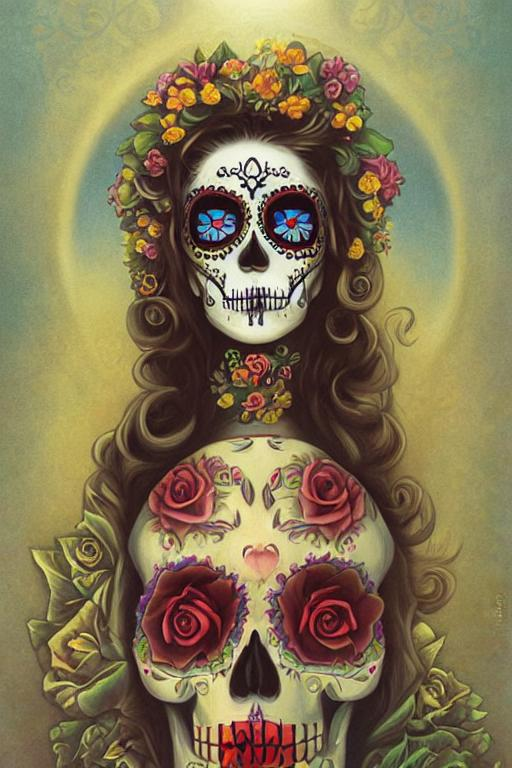

a detailed fifty mm portrait of billy boyd as a hobbit in a black adidas track suit with white stripes, headshot, highly detailed, digital painting, artstation, concept art, sharp focus, cinematic lighting, illustration, art by met mangindaan, artgerm and greg rutkowski, alphonse mucha, cgsociety


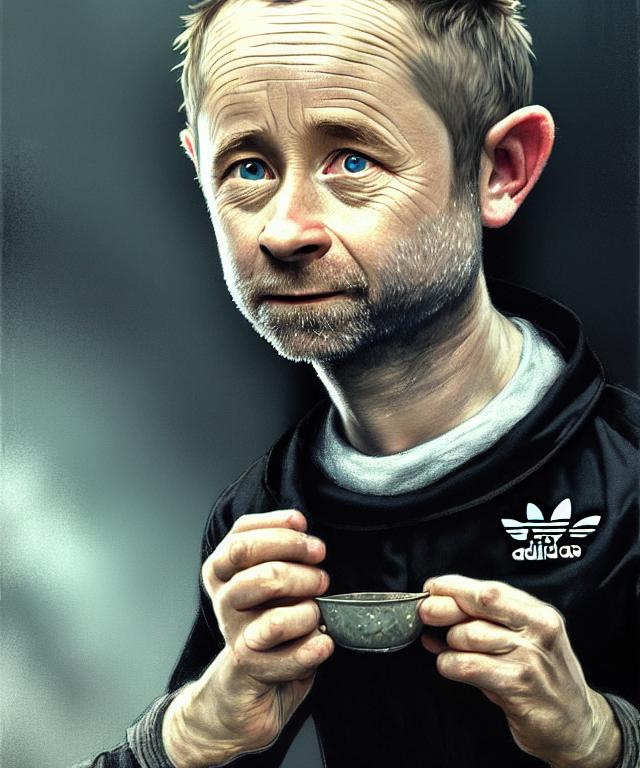

Beautiful Delicate Detailed portrait of sun summer woman, With Magical golden eyes by Tom Bagshaw, Bastien Lecouffe Deharme, Erik Johansson, Amanda Sage, Alex Grey, Alphonse Mucha, Harry Clarke, Josephine Wall and Pino Daeni, Delicate winter frozen creature With long golden Hair and Magical Sparkling Eyes, Magic Particles; Magic Swirls, in a out of this world magical summer landscape, 4K; 64 megapixels; 8K resolution concept art; detailed painting; digital illustration; hyperrealism; trending on Artstation; Unreal Engine Photorealistic, lifelike, Unreal Engine, sharp, sharpness, detailed, 8K


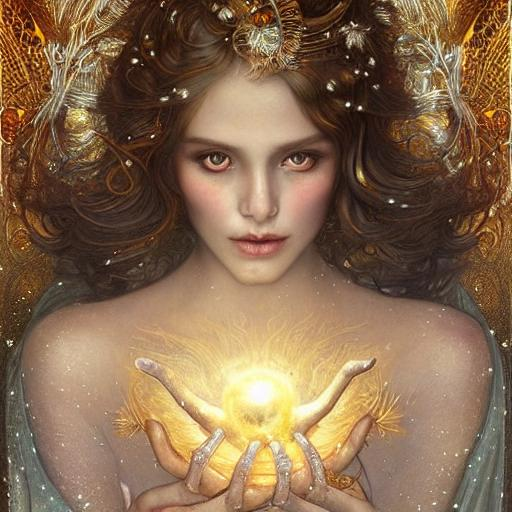

3 / 4 view of a portrait of a girl with wings with wings, confident pose, digital painting, artstation, concept art, smooth, sharp focus, illustration, trending on artstation, highly detailed, concept art, marvel comic, disney, pixar, trending on artstation h 6 4 0


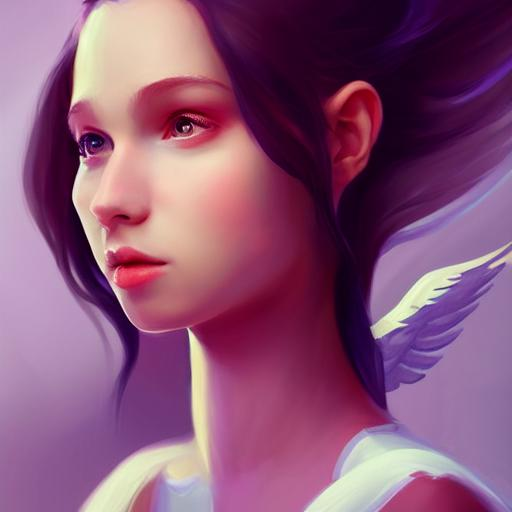

homer simpson glowing, beautiful, highly detailed, digital art, sharp focus, trending on art station


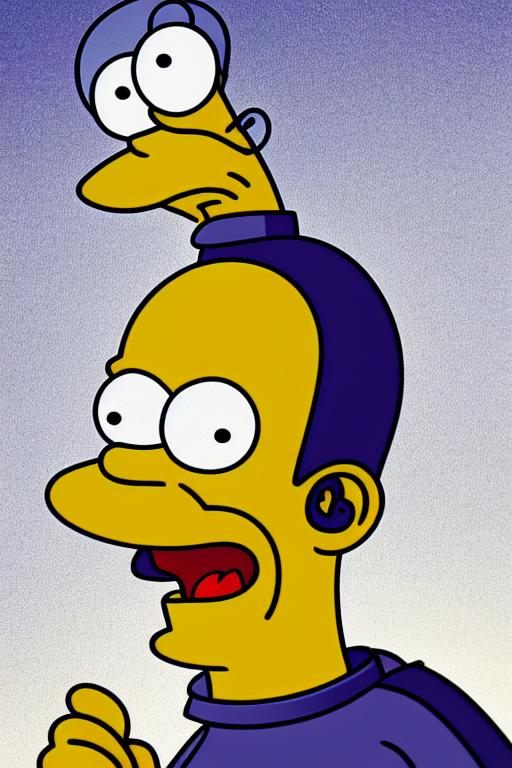

KeyboardInterrupt: Interrupted by user

In [15]:
for i in final_faces:
    print(prompts[i])
    display(Image.open(f'data/{i:04}.jpg'))
    input()

In [19]:
cands = []

for i in final_faces:
    prompt = prompts[i]
    prompt_words = prompt.split(',')
    prompt_prefx = prompt_words[0]
    
    placehold_word = '{user}'
    
    
    find = False
    for s in ['woman', 'man', 'girl', 'boy', 'person', 'guy']:
        if ' ' + s + ' ' in prompt_prefx or prompt_prefx[-len(s)-1:] == ' ' +s:
            prompt_prefx = prompt_prefx.replace(s, placehold_word)
            find = True
            break
            
    if not find:
        s = Sentence(prompt_prefx)
        tagger.predict(s)
        for label in s.get_labels():
            if label.value == 'PERSON' and f'by {label.data_point.text}' not in prompt_prefx:
                prompt_prefx = prompt_prefx.replace(label.data_point.text, placehold_word)
                find = True
                break
                
    prompt_words[0] = prompt_prefx
    
    cands.append({
        'ori_prompt': prompt,
        'new_prompt': ','.join(prompt_words)
    })
    
    

In [17]:
json.dumps(cands[3])

'{"ori_prompt": "3 / 4 view of a portrait of a girl with wings with wings, confident pose, digital painting, artstation, concept art, smooth, sharp focus, illustration, trending on artstation, highly detailed, concept art, marvel comic, disney, pixar, trending on artstation h 6 4 0", "new_prompt": "3 / 4 view of a portrait of a {user} with wings with wings, confident pose, digital painting, artstation, concept art, smooth, sharp focus, illustration, trending on artstation, highly detailed, concept art, marvel comic, disney, pixar, trending on artstation h 6 4 0"}'

In [20]:
with open('prompts.txt', 'w') as f:
    for c in cands:
        f.write(json.dumps(c))
        f.write('\n')